In [100]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
from tabulate import tabulate

In [101]:
#loading classrooms
classrooms = pd.read_excel('classrooms.xlsx')['Classroom'].tolist()

#loading teacher-course-department mapping
teachers_df = pd.read_excel('teachers.xlsx')

# courses specific to cse students along with num of credits
courses_df = pd.read_excel('cse_courses.xlsx')
# course_codes = courses_df['Course Code'].dropna().tolist()
course_info = {row['Course Code']: {"name":row['Course Name'], "credits": int(row['Credits'])} for idx,row in courses_df.iterrows()}
course_codes = list(course_info.keys())

#5 class sections
sections = ['cse1', 'cse2', 'cse3', 'cse4', 'cse5']



In [102]:
course_info

{'ECS': {'name': 'Etiquettes and Conversational Skills', 'credits': 2},
 'DC&CN': {'name': 'Data Communications & Computer Networks', 'credits': 3},
 'DAA': {'name': 'Design and Analysis of Algorithms', 'credits': 3},
 'DBMS': {'name': 'Database Management System', 'credits': 3},
 'WEB PROG.': {'name': 'Web Programming', 'credits': 2},
 'JAVA PROG': {'name': 'Java Programing', 'credits': 3},
 'OS SYS.': {'name': 'Operating Systems', 'credits': 3},
 'PRJ I': {'name': 'Project I', 'credits': 1}}

In [103]:
course_codes

['ECS', 'DC&CN', 'DAA', 'DBMS', 'WEB PROG.', 'JAVA PROG', 'OS SYS.', 'PRJ I']

In [104]:
# type(classrooms)
# type(teachers_df)
teachers_df

,Faculty,Course Code,Department
0,Mr. Beenu Taneja,ECS,CSE
1,Dr Shakti Kundu,DC&CN,CSE
2,Dr Soharab Hossain,DAA,CSE
3,Dr Kiran Sharma,DBMS,CSE
4,Dr Kiran Khatter,WEB PROG.,CSE
5,Dr Nikhil Kumar,JAVA PROG,CSE
6,Dr Saurabh Mishra,OS SYS.,CSE
7,Dr. Anubhav Agrawal.,PRJ I,CSE
8,Mr. Beenu Taneja,ECS,CSE
9,Dr Pramod Kumar,DC&CN,CSE


In [105]:
#each day has 8 periods
time_slots = [
    '9:15-10:10', '10:15-11:10', '11:15-12:10', '12:15-1:10',
    '1:15-2:10', '2:15-3:10', '3:10-4:15', '4:15-5:10'
]

lunch_slot_index = 5  # 2:15-3:10
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']


In [106]:
# section_course_teacher = {}   # (section, course) -> teacher
# for sec in sections:
#     print("CSE Section: ",sec)
#     for course in course_codes:
#         print("Course: ",course)
#         possible_teachers = teachers_df[
#             (teachers_df['Course Code'] == course) &
#             (teachers_df['Department'].str.upper() == 'CSE')
#         ]['Faculty'].tolist()
#         possible_teachers=list(set(possible_teachers))
#         print("Possible Teachers: ",possible_teachers)
#         #assigning a random teacher
#         if len(possible_teachers) == 0:
#             teacher = "TBA"
#             print(f"WARNING: No teacher available for {course}")
#         else:
#             teacher = random.choice(possible_teachers)
#         section_course_teacher[(sec, course)] = teacher
#         print("Teacher assigned: ",teacher)

course_to_teacher_list = {}
for course in course_codes:
    teachers = teachers_df[
        (teachers_df['Course Code'] == course) &
        (teachers_df['Department'].str.upper() == 'CSE')
    ]['Faculty'].dropna().unique().tolist()
    random.shuffle(teachers)  # shuffle for fairness
    course_to_teacher_list[course] = teachers

section_course_teacher = {}
for sec_index, sec in enumerate(sections):
    for course in course_codes:
        teachers_for_course = course_to_teacher_list.get(course, [])
        if not teachers_for_course:
            teacher = "TBA"
            print(f"WARNING: No teacher found for course '{course}'")
        else:
            teacher = teachers_for_course[sec_index % len(teachers_for_course)]
        section_course_teacher[(sec, course)] = teacher

In [107]:
section_course_teacher

{('cse1', 'ECS'): 'Mr. Beenu Taneja',
 ('cse1', 'DC&CN'): 'Dr Abhishek Jain',
 ('cse1', 'DAA'): 'Dr Soharab Hossain',
 ('cse1', 'DBMS'): 'Dr Kiran Sharma',
 ('cse1', 'WEB PROG.'): 'Dr Kiran Khatter',
 ('cse1', 'JAVA PROG'): 'Dr Nitin  Varyani',
 ('cse1', 'OS SYS.'): 'Ms. Monika Mokan',
 ('cse1', 'PRJ I'): 'Dr. Anubhav Agrawal.',
 ('cse2', 'ECS'): 'Mr. Shaganinder Singh Sidhu',
 ('cse2', 'DC&CN'): 'Dr Sandeep Kumar',
 ('cse2', 'DAA'): 'Dr. Meenakshi Malik',
 ('cse2', 'DBMS'): 'Dr Nishtha Phutela',
 ('cse2', 'WEB PROG.'): 'Dr Kiran Khatter',
 ('cse2', 'JAVA PROG'): 'Dr Nikhil Kumar',
 ('cse2', 'OS SYS.'): 'Dr Shilpa Mahajan',
 ('cse2', 'PRJ I'): 'Dr. Anubhav Agrawal.',
 ('cse3', 'ECS'): 'Mr. Beenu Taneja',
 ('cse3', 'DC&CN'): 'Dr Pramod Kumar',
 ('cse3', 'DAA'): 'Dr Sukhandeep Kaur',
 ('cse3', 'DBMS'): 'Dr Kiran Sharma',
 ('cse3', 'WEB PROG.'): 'Dr Kiran Khatter',
 ('cse3', 'JAVA PROG'): 'Dr Nitin  Varyani',
 ('cse3', 'OS SYS.'): 'Dr Saurabh Mishra',
 ('cse3', 'PRJ I'): 'Dr. Anubhav Agra

In [108]:
assignments = []  # (dept, section, course, teacher, instance_index)
for sec in sections:
    for course in course_codes:
        credits = course_info[course]['credits']
        teacher = section_course_teacher[(sec, course)]
        for inst in range(1,credits+1):
            assignments.append(('CSE', sec, course, teacher, inst))

In [109]:
assignments

[('CSE', 'cse1', 'ECS', 'Mr. Beenu Taneja', 1),
 ('CSE', 'cse1', 'ECS', 'Mr. Beenu Taneja', 2),
 ('CSE', 'cse1', 'DC&CN', 'Dr Abhishek Jain', 1),
 ('CSE', 'cse1', 'DC&CN', 'Dr Abhishek Jain', 2),
 ('CSE', 'cse1', 'DC&CN', 'Dr Abhishek Jain', 3),
 ('CSE', 'cse1', 'DAA', 'Dr Soharab Hossain', 1),
 ('CSE', 'cse1', 'DAA', 'Dr Soharab Hossain', 2),
 ('CSE', 'cse1', 'DAA', 'Dr Soharab Hossain', 3),
 ('CSE', 'cse1', 'DBMS', 'Dr Kiran Sharma', 1),
 ('CSE', 'cse1', 'DBMS', 'Dr Kiran Sharma', 2),
 ('CSE', 'cse1', 'DBMS', 'Dr Kiran Sharma', 3),
 ('CSE', 'cse1', 'WEB PROG.', 'Dr Kiran Khatter', 1),
 ('CSE', 'cse1', 'WEB PROG.', 'Dr Kiran Khatter', 2),
 ('CSE', 'cse1', 'JAVA PROG', 'Dr Nitin  Varyani', 1),
 ('CSE', 'cse1', 'JAVA PROG', 'Dr Nitin  Varyani', 2),
 ('CSE', 'cse1', 'JAVA PROG', 'Dr Nitin  Varyani', 3),
 ('CSE', 'cse1', 'OS SYS.', 'Ms. Monika Mokan', 1),
 ('CSE', 'cse1', 'OS SYS.', 'Ms. Monika Mokan', 2),
 ('CSE', 'cse1', 'OS SYS.', 'Ms. Monika Mokan', 3),
 ('CSE', 'cse1', 'PRJ I', 'Dr. 

In [110]:
#building the conflict graph
G = nx.Graph()

# adding one one node for each assignment
for n in assignments:
    G.add_node(n)

for i, n1 in enumerate(assignments):
    for j in range(i + 1, len(assignments)):
        n2 = assignments[j]
        #skipping same instance of the same class
        if n1[1] == n2[1] and n1[2] == n2[2] and n1[4] == n2[4]:
            continue
        #as one section can't have different classes simultaneously
        if n1[1] == n2[1]:
            G.add_edge(n1, n2)
        #one teacher cannot be teaching two classes simultaneously
        if n1[3] == n2[3]:
            G.add_edge(n1, n2)

In [111]:
# coloring the graph
# by assigning unique colors to n=unique timeslots
coloring = nx.coloring.greedy_color(G, strategy='largest_first')

In [112]:
#print the colors assigned to each course
for course, color in coloring.items():
    print(f"{course}: Color {color}")

('CSE', 'cse1', 'WEB PROG.', 'Dr Kiran Khatter', 1): Color 0
('CSE', 'cse1', 'WEB PROG.', 'Dr Kiran Khatter', 2): Color 1
('CSE', 'cse2', 'WEB PROG.', 'Dr Kiran Khatter', 1): Color 2
('CSE', 'cse2', 'WEB PROG.', 'Dr Kiran Khatter', 2): Color 3
('CSE', 'cse3', 'WEB PROG.', 'Dr Kiran Khatter', 1): Color 4
('CSE', 'cse3', 'WEB PROG.', 'Dr Kiran Khatter', 2): Color 5
('CSE', 'cse4', 'WEB PROG.', 'Dr Kiran Khatter', 1): Color 6
('CSE', 'cse4', 'WEB PROG.', 'Dr Kiran Khatter', 2): Color 7
('CSE', 'cse5', 'WEB PROG.', 'Dr Kiran Khatter', 1): Color 8
('CSE', 'cse5', 'WEB PROG.', 'Dr Kiran Khatter', 2): Color 9
('CSE', 'cse1', 'DBMS', 'Dr Kiran Sharma', 1): Color 2
('CSE', 'cse1', 'DBMS', 'Dr Kiran Sharma', 2): Color 3
('CSE', 'cse1', 'DBMS', 'Dr Kiran Sharma', 3): Color 4
('CSE', 'cse1', 'JAVA PROG', 'Dr Nitin  Varyani', 1): Color 5
('CSE', 'cse1', 'JAVA PROG', 'Dr Nitin  Varyani', 2): Color 6
('CSE', 'cse1', 'JAVA PROG', 'Dr Nitin  Varyani', 3): Color 7
('CSE', 'cse3', 'DBMS', 'Dr Kiran Sharm

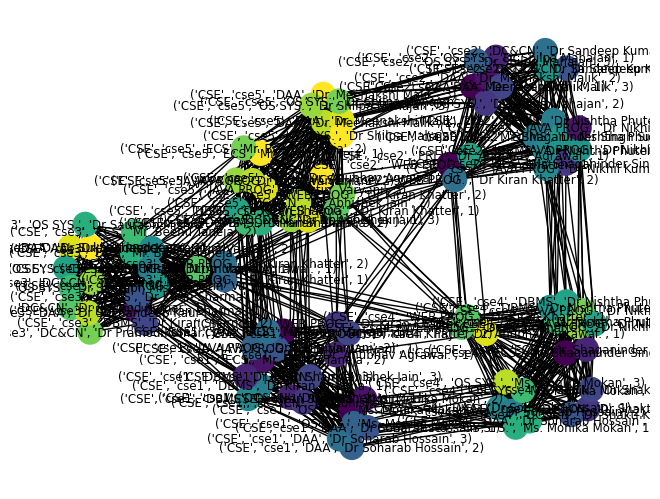

In [113]:
#drawing the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color=list(coloring.values()), cmap=plt.cm.viridis, font_color='black',font_size=8.5)
plt.show()

In [114]:
from collections import defaultdict, Counter

In [115]:
#for timetable storage and tracking
timetable = {
    sec: {
        day: {slot: '' for slot in range(len(time_slots))}
        for day in days_of_week
    } for sec in sections
}

assigned_rooms = {
    day: {slot: set() for slot in range(len(time_slots))}
    for day in days_of_week
}

assigned_teachers = {
    day: {slot: set() for slot in range(len(time_slots))}
    for day in days_of_week
}

# Track how many times a course appears per section per day to enforce max 2 per day
day_course_count = {
    sec: {day: Counter() for day in days_of_week}
    for sec in sections
}

In [116]:
timetable

{'cse1': {'Monday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''},
  'Tuesday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''},
  'Wednesday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''},
  'Thursday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''},
  'Friday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''}},
 'cse2': {'Monday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''},
  'Tuesday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''},
  'Wednesday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''},
  'Thursday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''},
  'Friday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''}},
 'cse3': {'Monday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''},
  'Tuesday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''},
  'Wednesday': {0: '', 1: '', 2: '', 3: '', 4: '', 5: '', 6: '', 7: ''},
  'Thursday': {0: '', 1: '', 2: '', 3: '', 4: ''

In [117]:
#assigning timetable slots based on colors
used_colors = set(coloring.values())
color_to_day_slot = {}

In [118]:
#there are 5 days * (8 slots - 1 lunch) = 35 valid slots per week per classroom
#hence, building a pool of possible (day,slot) excluding lunch, and 
# excluding Wednesday post lunch
available_slots = []
for day in days_of_week:
    for slot in range(len(time_slots)):
        # Exclude lunch slot everywhere
        if slot == lunch_slot_index:
            continue
        # Exclude post lunch slots on Wednesday
        if day == 'Wednesday' and slot > lunch_slot_index:
            continue
        available_slots.append((day, slot))

if len(available_slots) < len(used_colors):
    print("WARNING: Not enough available timeslots to schedule all classes without overlap.")

In [119]:
available_slots

[('Monday', 0),
 ('Monday', 1),
 ('Monday', 2),
 ('Monday', 3),
 ('Monday', 4),
 ('Monday', 6),
 ('Monday', 7),
 ('Tuesday', 0),
 ('Tuesday', 1),
 ('Tuesday', 2),
 ('Tuesday', 3),
 ('Tuesday', 4),
 ('Tuesday', 6),
 ('Tuesday', 7),
 ('Wednesday', 0),
 ('Wednesday', 1),
 ('Wednesday', 2),
 ('Wednesday', 3),
 ('Wednesday', 4),
 ('Thursday', 0),
 ('Thursday', 1),
 ('Thursday', 2),
 ('Thursday', 3),
 ('Thursday', 4),
 ('Thursday', 6),
 ('Thursday', 7),
 ('Friday', 0),
 ('Friday', 1),
 ('Friday', 2),
 ('Friday', 3),
 ('Friday', 4),
 ('Friday', 6),
 ('Friday', 7)]

In [120]:
# Map each color to a unique (day, slot)
# To improve spread, shuffle available_slots before assignment
shuffled_slots = available_slots.copy()
random.shuffle(shuffled_slots)

color_to_day_slot = {}
for c, slot in zip(sorted(used_colors), shuffled_slots):
    color_to_day_slot[c] = slot

In [121]:
# len(coloring.items())
# for i in coloring.items():
#     print(i)

In [122]:
color_to_day_slot

{0: ('Tuesday', 4),
 1: ('Monday', 0),
 2: ('Thursday', 4),
 3: ('Friday', 7),
 4: ('Thursday', 3),
 5: ('Thursday', 2),
 6: ('Monday', 1),
 7: ('Monday', 7),
 8: ('Monday', 6),
 9: ('Tuesday', 1),
 10: ('Wednesday', 4),
 11: ('Friday', 3),
 12: ('Friday', 4),
 13: ('Wednesday', 0),
 14: ('Tuesday', 2),
 15: ('Friday', 1),
 16: ('Friday', 6),
 17: ('Tuesday', 6),
 18: ('Thursday', 1),
 19: ('Tuesday', 0)}

In [123]:
#Filling timetable based on color assignments and constraints
for node, color in coloring.items():
    dept, sec, course, teacher, inst = node
    day, slot = color_to_day_slot[color]

    #check for: if slot already occupied for section
    if timetable[sec][day][slot]:
        # This means conflict or overlapping colors - should rarely happen if coloring correct
        print(f"Conflict detected: {sec} already has a class at {day} slot {slot}")
        continue

    #enforcing max 2 classes per course per section per day
    if day_course_count[sec][day][course] >= 2:
        # Need to reschedule or handle differently
        # For now, print warning and skip assignment (can be improved with backtracking)
        print(f"Max daily classes exceeded for {sec} {course} on {day}")
        continue

    # Enforce no double booking of teacher or rooms
    if teacher in assigned_teachers[day][slot]:
        print(f"Teacher {teacher} double-booked on {day} slot {slot}. Skipping {sec} {course} inst {inst+1}")
        continue

    # Find an available classroom
    room_assigned = None
    for room in classrooms:
        if room not in assigned_rooms[day][slot]:
            room_assigned = room
            break

    if not room_assigned:
        print(f"No room available on {day} slot {slot} for {sec} {course} inst {inst+1}")
        continue

    # Assign timetable entry
    timetable[sec][day][slot] = f"{course} ({course_info[course]['name']}) with {teacher} in {room_assigned}"

    # Mark teacher and room occupied
    assigned_teachers[day][slot].add(teacher)
    assigned_rooms[day][slot].add(room_assigned)

    # Count this course's occurrence on this day for section
    day_course_count[sec][day][course] += 1

Max daily classes exceeded for cse2 DBMS on Monday


In [124]:
# ---- Add fixed lunch breaks and Wednesday post-lunch blank slots ----
for sec in sections:
    for day in days_of_week:
        timetable[sec][day][lunch_slot_index] = "LUNCH BREAK"
        if day == 'Wednesday':
            for slot in range(lunch_slot_index + 1, len(time_slots)):
                timetable[sec][day][slot] = ""

In [125]:
for slot in range(len(time_slots)):
    print(slot)

0
1
2
3
4
5
6
7


In [126]:
timetable

{'cse1': {'Monday': {0: 'WEB PROG. (Web Programming) with Dr Kiran Khatter in nb201',
   1: 'JAVA PROG (Java Programing) with Dr Nitin  Varyani in nb202',
   2: '',
   3: '',
   4: '',
   5: 'LUNCH BREAK',
   6: 'ECS (Etiquettes and Conversational Skills) with Mr. Beenu Taneja in nb203',
   7: 'JAVA PROG (Java Programing) with Dr Nitin  Varyani in nb202'},
  'Tuesday': {0: 'OS SYS. (Operating Systems) with Ms. Monika Mokan in nb201',
   1: 'ECS (Etiquettes and Conversational Skills) with Mr. Beenu Taneja in nb202',
   2: 'DAA (Design and Analysis of Algorithms) with Dr Soharab Hossain in nb201',
   3: '',
   4: 'WEB PROG. (Web Programming) with Dr Kiran Khatter in nb201',
   5: 'LUNCH BREAK',
   6: 'OS SYS. (Operating Systems) with Ms. Monika Mokan in nb201',
   7: ''},
  'Wednesday': {0: 'DC&CN (Data Communications & Computer Networks) with Dr Abhishek Jain in nb201',
   1: '',
   2: '',
   3: '',
   4: 'PRJ I (Project I) with Dr. Anubhav Agrawal. in nb202',
   5: 'LUNCH BREAK',
   6:

In [128]:
import pandas as pd

for sec in sections:
    print("Section: ",sec)
    print("-------------------------------")
    # Prepare the data for DataFrame
    data = []
    for day in days_of_week:
        row = [day]
        for slot in range(len(time_slots)):
            cell = timetable[sec][day][slot]
            print("cell: ",cell)
            row.append(cell if cell else '')
        data.append(row)
    # print(tabulate(rows, headers=header, tablefmt='grid'))
    columns = ['Day/Slot'] + [f"Slot {i+1} ({time_slots[i]})" for i in range(len(time_slots))]
    df = pd.DataFrame(data, columns=columns)
    # Export to Excel: you can change the file name and path as needed
    df.to_excel(f"{sec}_timetable.xlsx", index=False)


Section:  cse1
-------------------------------
cell:  WEB PROG. (Web Programming) with Dr Kiran Khatter in nb201
cell:  JAVA PROG (Java Programing) with Dr Nitin  Varyani in nb202
cell:  
cell:  
cell:  
cell:  LUNCH BREAK
cell:  ECS (Etiquettes and Conversational Skills) with Mr. Beenu Taneja in nb203
cell:  JAVA PROG (Java Programing) with Dr Nitin  Varyani in nb202
cell:  OS SYS. (Operating Systems) with Ms. Monika Mokan in nb201
cell:  ECS (Etiquettes and Conversational Skills) with Mr. Beenu Taneja in nb202
cell:  DAA (Design and Analysis of Algorithms) with Dr Soharab Hossain in nb201
cell:  
cell:  WEB PROG. (Web Programming) with Dr Kiran Khatter in nb201
cell:  LUNCH BREAK
cell:  OS SYS. (Operating Systems) with Ms. Monika Mokan in nb201
cell:  
cell:  DC&CN (Data Communications & Computer Networks) with Dr Abhishek Jain in nb201
cell:  
cell:  
cell:  
cell:  PRJ I (Project I) with Dr. Anubhav Agrawal. in nb202
cell:  LUNCH BREAK
cell:  
cell:  
cell:  
cell:  OS SYS. (Operat

In [129]:
# ---- PRINT FINAL TIMETABLES ----
for sec in sections:
    print(f"\n--- Timetable for {sec} ---\n")
    header = ['Day/Slot'] + [f"Slot {i+1}\n{time_slots[i]}" for i in range(len(time_slots))]
    rows = []
    for day in days_of_week:
        row = [day]
        for slot in range(len(time_slots)):
            val = timetable[sec][day][slot]
            row.append(val if val else '')
        rows.append(row)
    print(tabulate(rows, headers=header, tablefmt='grid'))
    
    


--- Timetable for cse1 ---

+------------+--------------------------------------------------------------------------------+---------------------------------------------------------------------------+--------------------------------------------------------------------------+--------------------------------------------------------------------------------+--------------------------------------------------------------------------------+-------------+---------------------------------------------------------------------------+-----------------------------------------------------------------+
| Day/Slot   | Slot 1                                                                         | Slot 2                                                                    | Slot 3                                                                   | Slot 4                                                                         | Slot 5                                                                        

In [130]:
import pandas as pd

for sec in sections:
    # Prepare timetable data (course codes + room)
    timetable_data = []
    for day in days_of_week:
        row = [day]
        for slot in range(len(time_slots)):
            val = timetable[sec][day][slot]  # e.g. "AI (Artificial Intelligence) with Dr. A in nb109"
            if val and val not in ['LUNCH BREAK', '']:
                # Extract code and room from the string
                # Format assumed like: "COURSECODE (...) with TEACHER in ROOM"
                # Example: "AI (Artificial Intelligence) with Dr. A in nb109"
                # We'll extract COURSECODE and ROOM for timetable cells
                parts = val.split()
                course_code = parts[0]
                room = parts[-1]
                cell_val = f"{course_code} in {room}"
                row.append(cell_val)
            else:
                # Lunch break or empty slot
                row.append(val if val else '')
        timetable_data.append(row)

    # Columns for timetable table
    timetable_columns = ['Day/Slot'] + [f"Slot {i+1}\n{time_slots[i]}" for i in range(len(time_slots))]

    timetable_df = pd.DataFrame(timetable_data, columns=timetable_columns)

    # Prepare course summary table for this section
    # Collect unique courses scheduled for this section
    unique_courses = set()
    for day in days_of_week:
        for slot in range(len(time_slots)):
            val = timetable[sec][day][slot]
            if val and val not in ['LUNCH BREAK', '']:
                course_code = val.split()[0]
                unique_courses.add(course_code)

    # Prepare summary rows with course code, course name, and teacher
    summary_rows = []
    for course_code in sorted(unique_courses):
        course_name = course_info.get(course_code, {}).get('name', '')
        teacher = section_course_teacher.get((sec, course_code), '')
        summary_rows.append([course_code, course_name, teacher])

    summary_df = pd.DataFrame(summary_rows, columns=['Course Code', 'Course Name', 'Teacher Name'])

    # Export both tables side by side in a single Excel sheet
    excel_path = f"{sec}_timetable.xlsx"

    with pd.ExcelWriter(excel_path, engine='openpyxl') as writer:
        timetable_df.to_excel(writer, sheet_name='Timetable', startrow=0, startcol=0, index=False)
        summary_df.to_excel(writer, sheet_name='Timetable', startrow=0, startcol=len(timetable_columns) + 2, index=False)

    print(f"Exported timetable for {sec} to {excel_path}")


Exported timetable for cse1 to cse1_timetable.xlsx
Exported timetable for cse2 to cse2_timetable.xlsx
Exported timetable for cse3 to cse3_timetable.xlsx
Exported timetable for cse4 to cse4_timetable.xlsx
Exported timetable for cse5 to cse5_timetable.xlsx


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

def extract_course_code(cell_value):
    if not cell_value or cell_value in ['LUNCH BREAK', '']:
        return None
    # e.g. "AI in nb102" or "DM (Discrete Math) with Dr. A in nb102"
    return cell_value.split()[0]

def visualize_timetable(timetable, section, days_of_week, time_slots):
    plt.figure(figsize=(12, 6))
    plt.title(f"Timetable for {section}", pad=20)

    # Collect unique course codes for color mapping
    unique_courses = set()
    for day in days_of_week:
        for slot in range(len(time_slots)):
            code = extract_course_code(timetable[section][day][slot])
            if code:
                unique_courses.add(code)

    # Assign a color to each unique course
    base_colors = [
        'skyblue', 'lightgreen', 'orange', 'salmon', 'plum', 'hotpink',
        'gold', 'cyan', 'lime', 'coral', 'orchid', 'lightgrey'
    ]
    color_map = {course: base_colors[i % len(base_colors)] for i, course in enumerate(sorted(unique_courses))}

    # Plot timetable: {day: index from bottom}
    reversed_days_of_week = list(reversed(days_of_week))
    for day_index, day in enumerate(reversed_days_of_week, 1):
        for slot_index in range(len(time_slots)):
            val = timetable[section][day][slot_index]
            code = extract_course_code(val)
            if code:
                plt.barh(
                    day_index, 0.9, left=slot_index + 1 - 0.5,
                    color=color_map[code], edgecolor='black'
                )
                plt.text(
                    slot_index + 1, day_index, code,
                    color='black', fontsize=8, ha='center', va='center'
                )
            elif val == 'LUNCH BREAK':
                plt.barh(
                    day_index, 0.9, left=slot_index + 1 - 0.5,
                    color='lightgrey', edgecolor='black'
                )
                plt.text(
                    slot_index + 1, day_index, "LUNCH",
                    color='black', fontsize=7, ha='center', va='center'
                )

    # Add time slot labels along top
    for i in range(1, len(time_slots)+1):
        plt.text(i, len(days_of_week) + 1, time_slots[i-1], fontsize=8, ha='center')

    plt.yticks(range(1, len(days_of_week)+1), reversed_days_of_week, fontsize=10)
    plt.xticks([])
    plt.grid(True, linestyle='--', alpha=0.3)

    # Add legend
    legend_patches = [mpatches.Patch(color=color_map[course]) for course in sorted(unique_courses)]
    plt.legend(legend_patches, sorted(unique_courses), title='Courses', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()



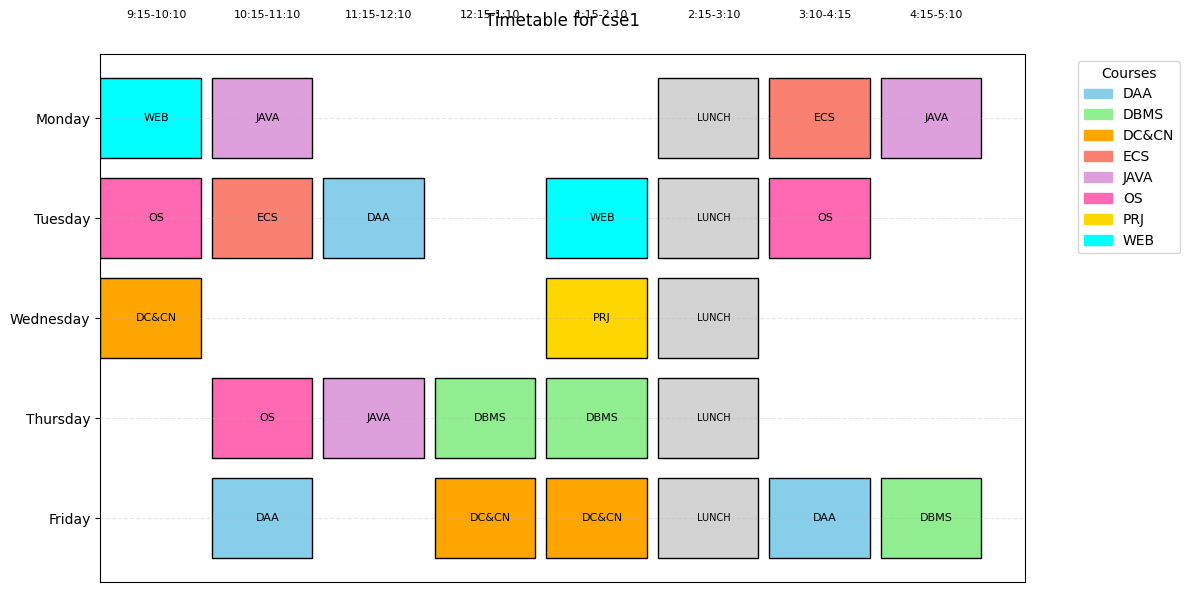

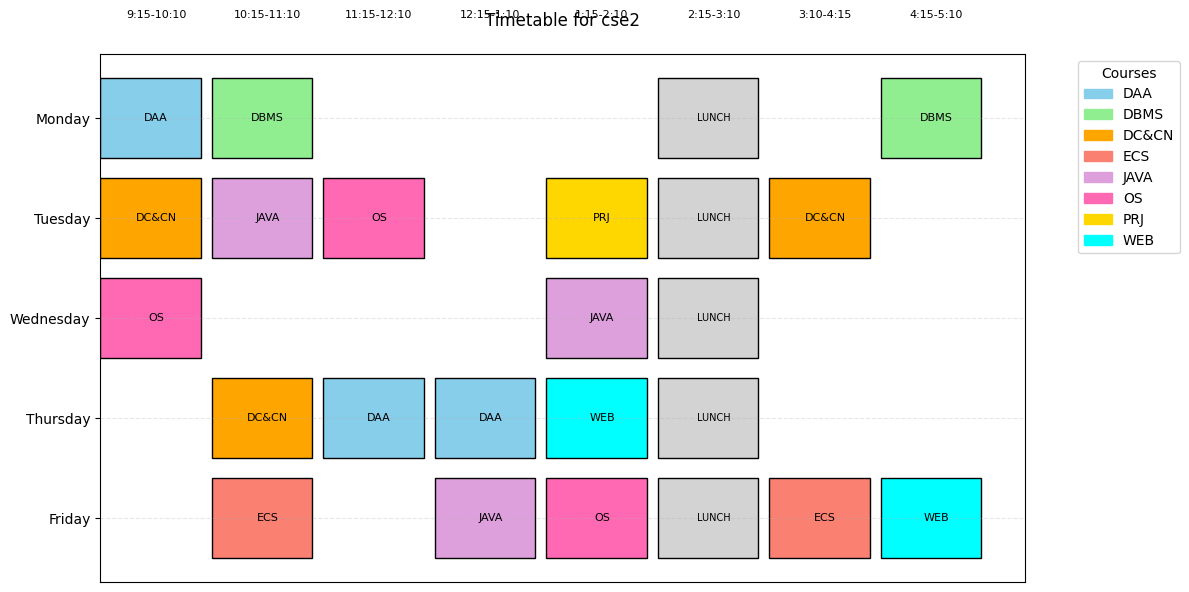

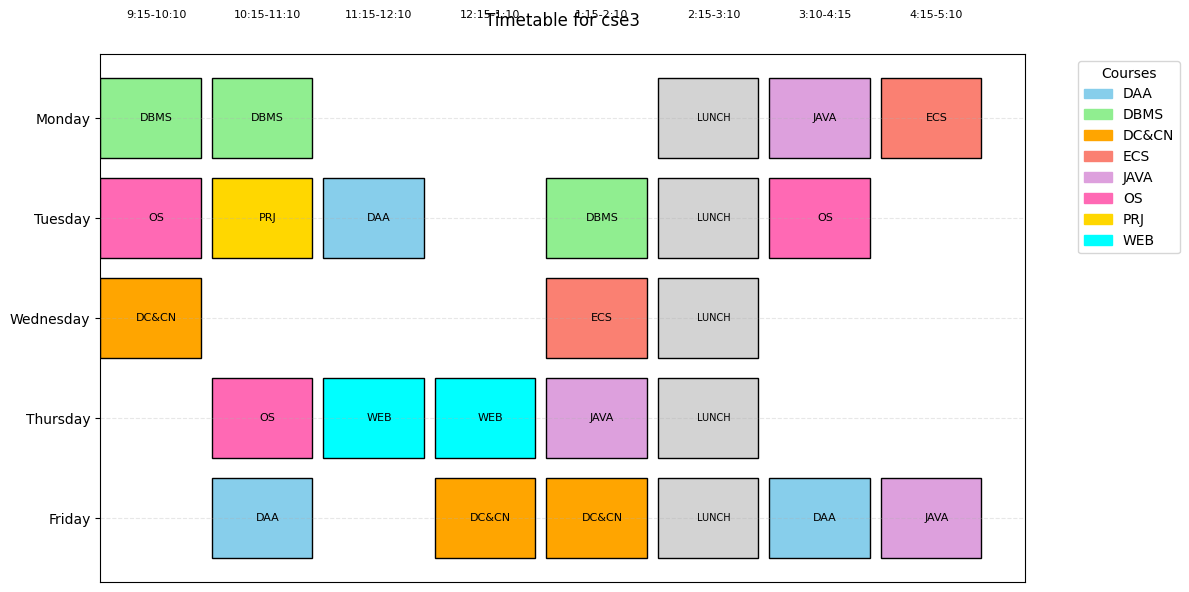

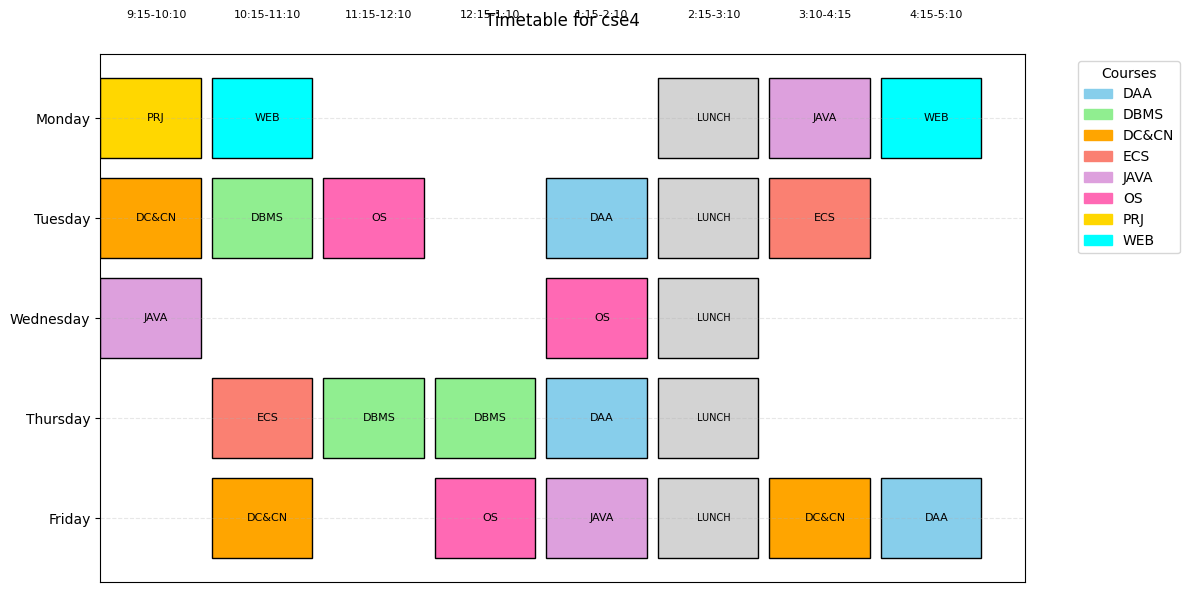

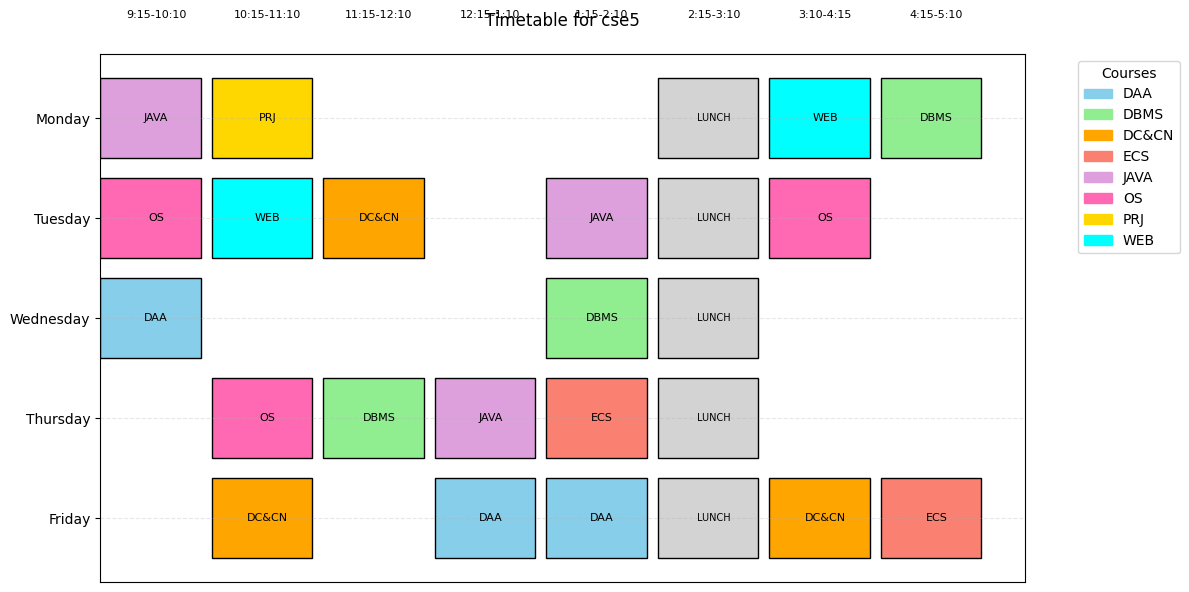

In [132]:
for section in sections:
    visualize_timetable(timetable, section, days_of_week, time_slots)